# Guided Project_ Analyzing NYC High School Data

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. This aim of this project is that investigating the correlations between [SAT scores](https://en.wikipedia.org/wiki/SAT) and demographics. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

## Data Resource

There are some website contain some several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

* [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)- SAT scores for each high school in New York City
* [School attendance ](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt)- Attendance information for each school in New York City
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
* [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information
* [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school
* [School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

## Background Research

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:
* [New York City](https://en.wikipedia.org/wiki/New_York_City)
* [The SAT](https://en.wikipedia.org/wiki/SAT)
* [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
* [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

* Only high school students take the SAT, so we'll want to focus on **high schools**.
* New York City is made up of five boroughs, which are essentially **distinct regions**.
* New York City schools fall within several **different school districts**, each of which can contains dozens of schools.
* Our data sets include several different types of schools. We'll need to clean them so that we can focus on **high schools only**.
* Each school in New York City has a **unique code called a DBN, or district borough number**.
* Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

## Main Part


### 1. Read Data

we've placed all the data into the `schools folder`. Here are all of the files in the folder:

* `ap_2010.csv` - Data on [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e)
* `class_size.csv` - Data on [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
* `demographics.csv` - Data on [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)
* `graduation.csv` - Data on [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a)
* `hs_directory.csv` - A directory of [high schools](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2)
* `sat_results.csv` - Data on [SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)
* `survey_all.txt` - Data on [surveys from all schools](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8)
* `survey_d75.txt` - Data on surveys from New York City [district 75](http://schools.nyc.gov/academics/specialEducation/D75/default.htm)

`survey_all.txt` and `survey_d75.txt` are in more complicated formats than the other files.

We'll read each file into a `pandas dataframe`, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on.

In [1]:
## Import the module we may be use
import pandas as pd
import numpy as np
import re


In [2]:
## Read csv. file first and store them into one dictionary
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data={}
for file in data_files:
    df=pd.read_csv('schools/{0}'.format(file))
    key_name=file.replace('.csv','')
    data[key_name]=df

In [3]:
## Display each key in data dictionary
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])

In [4]:
## Display sat_results in data doctionary
data['sat_results'].info()
data['sat_results'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We have following observations:
* The `DBN` appears to be a unique ID for each school.
* There are some 'high schools' that we need to concern
* the data type of `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `and SAT Writing Avg. Score` is object, it should be transfer to numerical type and combine them to make the scores easier to analyze.

If we review every dataframe in data dictionary, we have the following observations:
* Each data set appears to either have a `DBN` column, or the information we need to create one. That means we can use a `DBN` column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.
* Some fields look interesting for mapping -- particularly `Location 1`, which contains coordinates inside a larger string.
* Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate `DBN` values). That means we’ll have to do some preprocessing to ensure that each `DBN` is unique within each data set.

Let's read the remaining two file (`survey_all.txt` and `survey_d75.txt`) first because they're in a slightly more complex format.

The files are tab delimited and encoded with `Windows-1252` encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are `UTF-8` and `ASCII`. `Windows-1252` is rarely used, and can cause errors if we read such a file in without specifying the encoding.

In [5]:
## Read txt. file into df
survey_all=pd.read_csv('schools/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

In [6]:
survey_all.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,20.0,16.0,23.0,54.0,33.0,29.0,31.0,46.0,16.0,8.0
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
d75_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,...,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,...,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0
3,75K077,K077,P.S. K077,1,Yes,NaN,District 75 Special Education,95.0,65,55,...,14.0,14.0,7.0,11.0,16.0,10.0,6.0,4.0,7.0,7.0
4,75K140,K140,P.S. K140,1,Yes,0.0,District 75 Special Education,77.0,70,42,...,35.0,34.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## combine them into on dataframe
survey=pd.concat([survey_all,d75_survey],axis=0)
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We find:
* There are over `2000` columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
* The survey data has a `dbn` column that we'll want to convert to uppercase (`DBN`). The conversion will make the column name consistent with the other data sets.

we'll need to filter the columns to remove the ones we don't need. we can use the [data dictionary](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) to determine which columns to use.


<img src="schools/survey_data_dictionary.png" alt="Drawing" style="width: 700px;"/>

Based on the dictionary, it looks like these are the relevant columns:

\["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"\]

These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It will also give us the `DBN`, which allows us to uniquely identify the school.



In [9]:
## rename 'dbn' to 'DBN' and filter columns
survey['DBN']=survey['dbn']
re_columns=[
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey=survey.loc[:,re_columns]
data['survey']=survey

In [10]:
## display survey first few rows
survey.head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


We have filter the columns as 23 columns in survey data. The 'DBN' is unique number for each row. For now, we have been read all the file data into dataframe, next we will clean data. 

### 2. Clean Data

When we explored all of the data sets, we noticed that some of them, like `class_size` and `hs_directory`, don't have a `DBN` column. `hs_directory` does have a `dbn` column, though, so we can just rename it.

In [11]:
data['hs_directory'].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [12]:
## rename 'dbn to 'DBN' in 'hs_directory' df
data['hs_directory']['DBN']=data['hs_directory']['dbn']

In [13]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


From looking at these rows, we can tell that the `DBN` in the sat_results data is just a combination of the `CSD` and `SCHOOL CODE` columns in the `class_size` data. The main difference is that the `DBN` is padded, so that the `CSD` portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long.

In [14]:
## create a function to add csd and school code together to match dbn
def pad_csd(num):
    return str(num).zfill(2)
## generate new 'DBN' column in class_size
data['class_size']['padded_csd']=data['class_size']['CSD'].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [15]:
## display class_size df
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


Now we're almost ready to combine our data sets. Before we do, let's take some time to calculate variables that will be useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the `SAT Math Avg. Score`, `SAT Critical Reading Avg. Score`, and `SAT Writing Avg. Score` columns in the `sat_results `data set from the object (string) data type to a numeric data type

In [16]:
## Convert columns to numeric
cols=['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data['sat_results'][c]=pd.to_numeric(data['sat_results'][c], errors='coerce')

data['sat_results']['sat_score']=data['sat_results'][cols[0]]+data['sat_results'][cols[1]]+data['sat_results'][cols[2]]

data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field `Location 1` in the `hs_directory` data set.

In [17]:
pd.set_option('display.max_colwidth', None)
data['hs_directory']['Location 1'].head()

0        883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)
1              1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)
2          1501 Jerome Avenue\nBronx, NY 10452\n(40.842414068000494, -73.91616158599965)
3          411 Pearl Street\nNew York, NY 10038\n(40.71067947100045, -74.00080702099967)
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40.718810094000446, -73.80650045499965)
Name: Location 1, dtype: object

If we see 'Location 1' columns, we can find that we just want to extract latitude and longtitude into parentheses. For example, for `index 1`, we just need latitude, `40.8276026690005`, and the longitude, `-73.90447525699966`

In [18]:
## create a function to get latitude
def get_lat(loc):
    coords=re.findall(r'\(.+\)',loc)
    lat=coords[0].split(',')[0].replace('(','').strip()
    return lat
## create a function to get longtitude
def get_lon(loc):
    coords=re.findall(r'\(.+\)',loc)
    lon=coords[0].split(',')[1].replace(')','').strip()
    return lon


In [19]:
## apply funtion to get latitude and longtitude 
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(get_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(get_lon)

## convert string to numeric

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

In [20]:
data["hs_directory"][['lat','lon']].info()
data["hs_directory"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     435 non-null    float64
 1   lon     435 non-null    float64
dtypes: float64(2)
memory usage: 6.9 KB


,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.842414068000494, -73.91616158599965)",09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.71067947100045, -74.00080702099967)",02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary School,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40.718810094000446, -73.80650045499965)",28Q680,40.718810,-73.806500


We have been create two new columns `lat` and `lon` in `hs_dictionary` df

### 3. Combine Data

If we look at `class_size`, `graduation`, and `demographics` data sets, we can find `DBN` is not unique.


In [21]:
class_size=data['class_size']
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [22]:
graduation=data['graduation']
graduation.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [23]:
demographics=data['demographics']
demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


So,we'll condense the `class_size`, `graduation`, and `demographics` data sets so that each DBN is unique.


#### Condense 'class_size' data set 



In [24]:
class_size

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32,32K564
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN,32,32K564
27609,32,K,K564,Bushwick Community High School,09-12,CTT,MATH,Integrated Algebra,-,50.0,2.0,25.0,25.0,25.0,STARS,NaN,32,32K564


As you can see, the first few rows all pertain to the same school, which is why the `DBN` appears more than once. It looks like each school has multiple values for `GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY)`, and `CORE COURSE (MS CORE and 9-12 ONLY)`.

In [25]:
class_size['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the `GRADE` column is `09-12`.

In [26]:
class_size['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`.

In [27]:
## Filter class_size so the GRADE  column only contains the value 09-12
class_size = class_size[class_size["GRADE "] == "09-12"]

## Filter class_size so that the PROGRAM TYPE column only contains the value GEN ED
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

In [28]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


As we saw when we displayed `class_size` on the last screen, `DBN` still isn't completely unique. This is due to the `CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` columns.


In [29]:
class_size['CORE COURSE (MS CORE and 9-12 ONLY)'].unique()

array(['English 9', 'English 10', 'English 11', 'English 12',
       'Integrated Algebra', 'Geometry', 'Other Math', 'Earth Science',
       'Living Environment', 'Chemistry', 'Physics', 'Other Science',
       'Global History & Geography', 'US History & Government',
       'MS English Core', 'Other English', 'Trigonometry',
       'Participation in Government', 'Math A', 'Economics',
       'Other Social Studies', 'Math B'], dtype=object)

In [30]:
class_size['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

If we focus core subject, this column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique DBN values, while also incorporating as much data as possible into the average

In [31]:
## split a dataframe up into unique groups, based on a DBN.
class_size=class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)

data["class_size"] = class_size

class_size


,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN
1,01M332,1,46.000000,2.000000,22.000000,21.000000,23.500000,NaN
2,01M378,1,33.000000,1.000000,33.000000,33.000000,33.000000,NaN
3,01M448,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN
4,01M450,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN
...,...,...,...,...,...,...,...,...
578,32K549,32,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
579,32K552,32,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
580,32K554,32,66.937500,3.812500,17.793750,14.750000,21.625000,NaN
581,32K556,32,132.333333,5.400000,25.060000,18.333333,30.000000,NaN


DBN has unique values in this data set

#### Condense 'demographics' data set 


In [32]:
demographics

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20072008,85.6,NaN,355,NaN,NaN,NaN,NaN,...,151,42.5,198,55.8,5,1.4,181.0,51.0,174.0,49.0
10071,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20082009,65.2,NaN,383,NaN,NaN,NaN,NaN,...,132,34.5,245,64.0,2,0.5,206.0,53.8,177.0,46.2
10072,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20092010,,89.2,395,NaN,NaN,NaN,NaN,...,146,37.0,242,61.3,3,0.8,199.0,50.4,196.0,49.6
10073,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20102011,,88.2,420,NaN,NaN,NaN,NaN,...,166,39.5,242,57.6,8,1.9,209.0,49.8,211.0,50.2


In this case, the only column that prevents a given `DBN` from being unique is schoolyear. We only want to select rows where schoolyear is `20112012`. This will give us the most recent year of data, and also match our SAT results data.

In [33]:
demographics=demographics[demographics["schoolyear"] == 20112012]
data['demographics']=demographics

In [34]:
demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


DBN has unique values in this demographics data set

#### Condense 'graduation' data set

In [35]:
graduation

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2003,65,1,1.5%,0,0%,0%,...,0,0%,0%,1,1.5%,100%,44.0,67.7%,20.0,30.8%
25092,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2004,64,2,3.1%,0,0%,0%,...,0,0%,0%,2,3.1%,100%,38.0,59.4%,22.0,34.4%
25093,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2005,79,3,3.8%,1,1.3%,33.3%,...,1,1.3%,33.3%,2,2.5%,66.7%,46.0,58.2%,28.0,35.4%
25094,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,57,4,7%,2,3.5%,50%,...,2,3.5%,50%,2,3.5%,50%,34.0,59.6%,17.0,29.8%


The `Demographic` and `Cohort` columns are what prevent `DBN` from being unique in the graduation data. A `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group. In this case, we want to pick data from the most recent `Cohort` available, which is `2006`. We also want data from the full cohort, so we'll only pick rows where `Demographic` is `Total Cohort`.

In [36]:
graduation=graduation[(graduation['Cohort']=='2006') & (graduation['Demographic']=='Total Cohort')]
data["graduation"]=graduation

In [37]:
graduation.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


DBN has unique values in this graduation data set

#### Convert AP scores to numeric

We're almost ready to combine all of the data sets. The only remaining thing to do is convert the [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.


In [38]:
ap_2010=data['ap_2010']
ap_2010.info()
ap_2010.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   DBN                                   258 non-null    object
 1   SchoolName                            258 non-null    object
 2   AP Test Takers                        258 non-null    object
 3   Total Exams Taken                     258 non-null    object
 4   Number of Exams with scores 3 4 or 5  258 non-null    object
dtypes: object(5)
memory usage: 10.2+ KB


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the `ap_2010` data set to numeric values first. 

There are three columns we'll need to convert:

* `AP Test Takers` (note that there's a trailing space in the column name)
* `Total Exams Taken`
* `Number of Exams with scores 3 4 or 5`

In [39]:
## convert columns to numeric
cols=['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for c in cols:
    ap_2010[c]=pd.to_numeric(ap_2010[c], errors="coerce")

data['ap_2010']=ap_2010
print(data["ap_2010"].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


#### Combine data based on DBN

We'll be using the `DBN` column to identify matching rows across data sets. In other words, the values in that column will help us know which row from the first data set to combine with which row in the second data set.

There may be `DBN` values that exist in one data set but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the `DBN` values in `sat_results` in all of the other data sets, and other data sets may have `DBN` values that don't exist in `sat_results`.

We'll merge two data sets at a time. For example, we'll merge `sat_results` and `hs_directory`, then merge the result with `ap_2010`, then merge the result of that with `class_size`. We'll continue combining data sets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets.

Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from `sat_results` while minimizing null values.

ome data sets have `DBN` values that are almost identical to those in `sat_results`. Those data sets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from `demographics`, for example. Therefore, we'll do an inner join to avoid missing data in these columns.

In [40]:
## Merge data set with sat_results
combined=data['sat_results']

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")



Now that we've performed the `left` joins, we still have to merge `class_size, demographics, survey`, and `hs_directory` into combined. Because these files contain information that's more valuable to our analysis and also have fewer missing `DBN` values, we'll use the `inner` join type.

In [41]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
## fill mean and 0 to nan values
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In [42]:
combined.head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.71376394700047, -73.98526003999967)",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.7123318510005, -73.98479662499966)",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0.0,0.0,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.729782687000466, -73.98304144099967)",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0.0,0.0,0.0,"145 Stanton Street\nNew York, NY 10002\n(40.720569079000484, -73.98567269099965)",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0.0,0.0,0.0,"111 Columbia Street\nNew York, NY 10002\n(40.718725451000466, -73.97942638599966)",40.718725,-73.979426


#### Add a school district column for mapping
We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the `DBN`. We can apply a function over the `DBN` column of `combined` that pulls out the first two letters.

In [43]:
## Add a school district column for mapping
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

#### Find correlations
Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

In [44]:
## find correlations
correlations=combined.corr()
correlations = correlations["sat_score"]
pd.set_option('display.max_rows', None)

print(correlations.sort_values(ascending=False))

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
white_per                               0.620718
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num                              0.388631
AVERAGE CLASS SIZE                      0.381014
total_enrollment                        0.367857
NUMBER OF SECTIONS                      0.362673
aca_s_11                                0.339435
saf_s_11            

Unsurprisingly, `SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score`, and `sat_score are strongly` correlated with `sat_score`.


We can also make some other observations:

* `total_enrollment` has a strong positive correlation with `sat_score`. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
 * Other columns that are proxies for enrollment correlate similarly. These include `total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken`, and `NUMBER OF SECTIONS`.
* Both the percentage of females (`female_per`) and number of females (`female_num`) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (`male_num`) correlate negatively. This could indicate that women do better on the SAT than men.
* Teacher and student ratings of school safety (`saf_t_11, and saf_s_11`) correlate with sat_score.
* Student ratings of school academic standards (`aca_s_11`) correlate with sat_score, but this does not hold for ratings from teachers and parents (`aca_p_11 and aca_t_11`).
* There is significant racial inequality in SAT scores (`white_per, asian_per, black_per, hispanic_per`).
* The percentage of English language learners at the school (`ell_percent, frl_percent`) has a strong negative correlation with SAT scores.

### 4. Analyzing and Visualizing the Data


We first focus on the 'total_enrollment' vs 'sat_score'. We will generate a scatterplot to visualize relationships.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

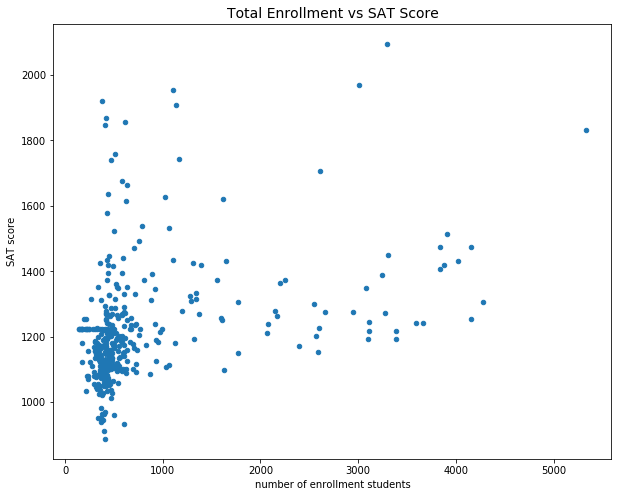

In [46]:
## generate a scatterplot
ax=combined.plot.scatter(x='total_enrollment', y='sat_score',figsize=(10,8))
ax.set_xlabel('number of enrollment students')
ax.set_ylabel('SAT score')
ax.set_title('Total Enrollment vs SAT Score',fontdict={'fontsize':14})
plt.show()

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between `sat_score` and `total_enrollment`. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where `total_enrollment` and `sat_score` are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [47]:
## Filter total_enrollment is under 1000 and sat_score is under 1000. 
low_enrollment=combined[(combined['total_enrollment']<1000) & (combined['sat_score']<1000)]
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


After check some infomation on above high school, we found that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ell_percent that correlates strongly with `sat_score`, rather than `total_enrollment`. To explore this relationship further, let's plot out `ell_percent` vs `sat_score`.

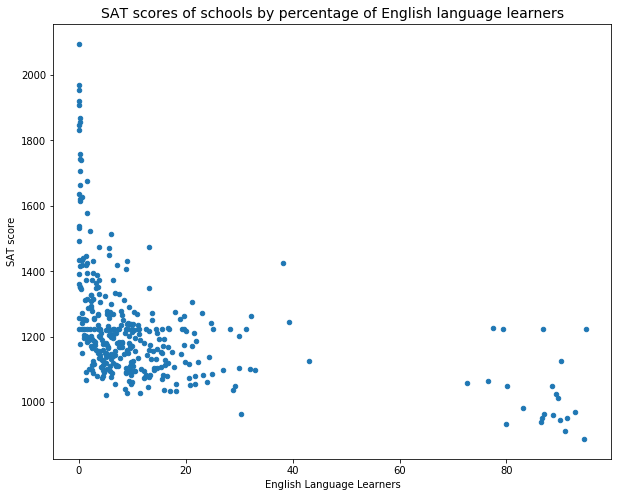

In [48]:
ax=combined.plot.scatter(x='ell_percent', y='sat_score',figsize=(10,8))
ax.set_xlabel('English Language Learners')
ax.set_ylabel('SAT score')
ax.set_title('SAT scores of schools by percentage of English language learners',fontdict={'fontsize':14})
plt.show()

It looks like `ell_percent` correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high `ell_percent` values and low `sat_score` values. This cluster represents the same group of international high schools we investigated earlier.

In order to explore this relationship, we'll want to map out `ell_percent` by school district. The map will show us which areas of the city have a lot of English language learners.

We extracted the coordinates for all of the schools earlier, and stored them in the `lat` and `lon` columns. The coordinates will enable us to plot all of the schools on a map of New York City.

/Users/mr_yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/mr_yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


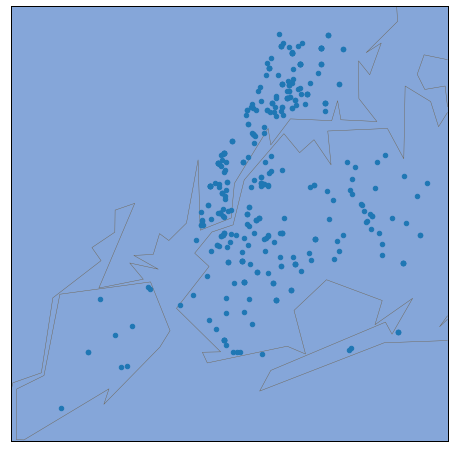

In [49]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
    
)   
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
    

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
    
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()

From the map on the previous screen, we can see that school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.

/Users/mr_yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/mr_yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


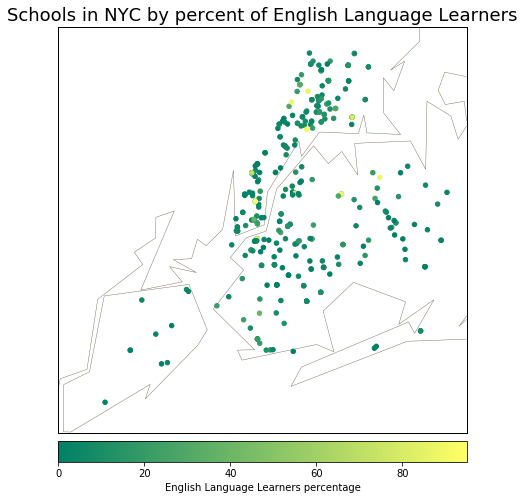

In [50]:

from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary()
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")
m.colorbar(location='bottom', label='English Language Learners percentage')
plt.title('Schools in NYC by percent of English Language Learners', fontdict={'fontsize':18})
plt.show()

Unfortunately, due to the number of schools, it's hard to interpret the map we made on the last screen. It looks like uptown Manhattan and parts of Queens have a higher `ell_percent`, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot `ell_percent` district-by-district instead of school-by-school.

In [51]:
districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251


Now that we've taken the means of all of the columns, we can plot out `ell_percent` by district. Not only did we find the mean of `ell_percent`, but we also took the means of the lon and lat columns, which will give us the coordinates for the center of each district.

/Users/mr_yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/mr_yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


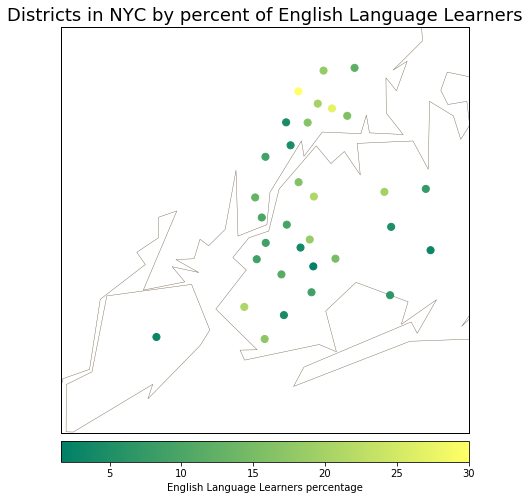

In [52]:
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary()
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
m.colorbar(location='bottom', label='English Language Learners percentage')
plt.title('Districts in NYC by percent of English Language Learners', fontdict={'fontsize':18})
plt.show()

### 5. Plotting Survey Correlations
New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

we have been store some possible relation fields in `re_columns` list.

In [53]:
## the columns of survey fields had been stored in useful_cols earlier
## remove DBN as it is a unique identifier
survey_fields=re_columns
survey_fields.remove('DBN')

Text(0.5, 1.0, 'Correlation of Survey fields with SAT scores')

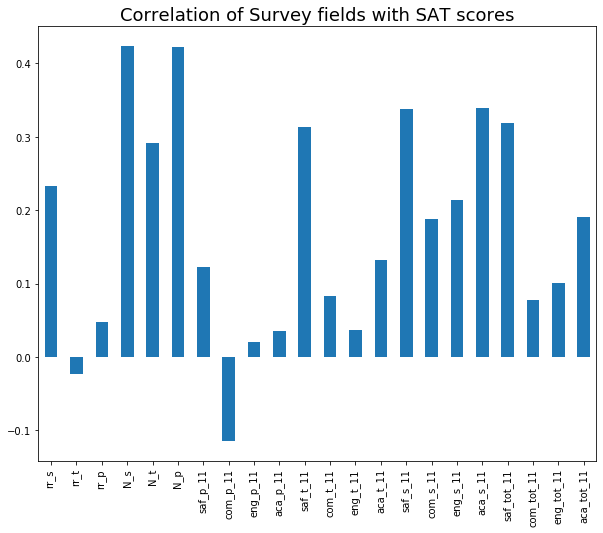

In [54]:
## plot bar chart to display correlation between survey fields and SAT score
ax=combined.corr()['sat_score'][survey_fields].plot.bar(figsize=(10,8))
ax.set_title('Correlation of Survey fields with SAT scores', fontdict={'fontsize':18})

There are high correlations between `N_s, N_t, N_p` and `sat_score`. Since these columns are correlated with `total_enrollment`, it makes sense that they would be high.

It is more interesting that `rr_s`, the student response rate, or the percentage of students that completed the survey, correlates with `sat_score`. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (`saf_t_11` and `saf_s_11`) correlate with `sat_score`. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the `aca_s_11`, which indicates how the student perceives academic standards, correlates with `sat_score`, but this is not true for `aca_t_11`, how teachers perceive academic standards, or `aca_p_11`, how parents perceive academic standards.

#### 5.1 Safety vs SAT score

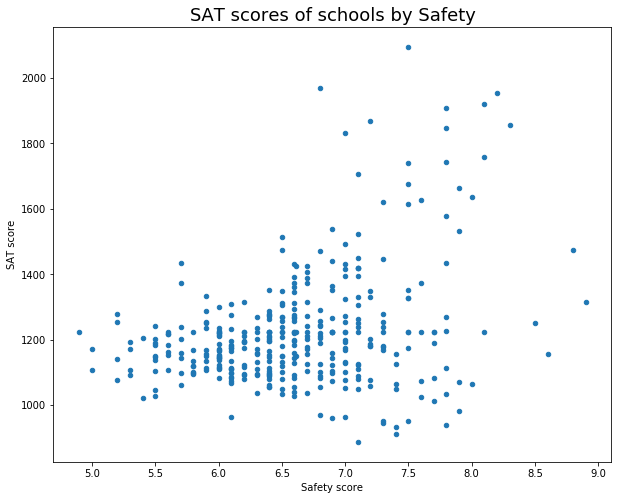

In [55]:
## plot 'saf_s_11' vs 'sat_score'
ax=combined.plot.scatter("saf_s_11", "sat_score",figsize=(10,8))
ax.set_xlabel('Safety score')
ax.set_ylabel('SAT score')
ax.set_title('SAT scores of schools by Safety',fontdict={'fontsize':18} )
plt.show()

There appears to be a correlation between SAT scores and safety, although it isn't thatstrong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

/Users/mr_yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/mr_yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


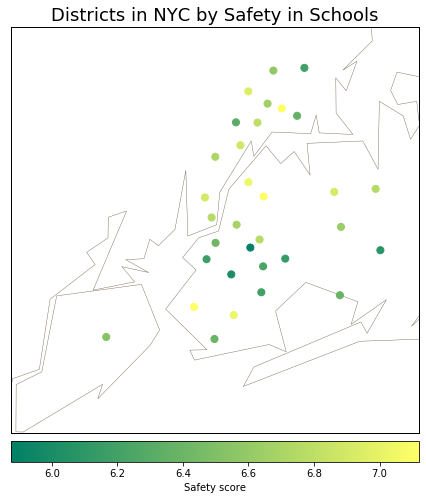

In [56]:
## Make a map that shows safety scores by district
plt.figure(figsize=(10,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary()
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer", edgecolors='face')
m.colorbar(location='bottom', label='Safety score')
plt.title('Districts in NYC by Safety in Schools', fontdict={'fontsize':18})
plt.show()

It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.

#### 5.2 Racial Differences in SAT Performance

Text(0.5, 1.0, 'Correlation of Races with SAT scores')

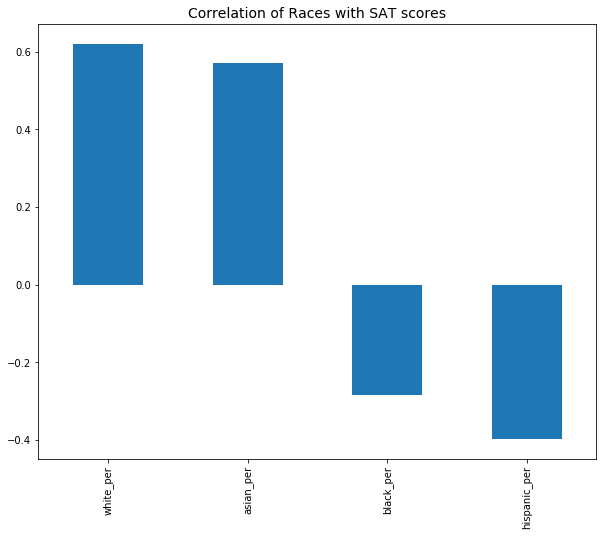

In [57]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
ax=combined.corr()["sat_score"][race_fields].plot.bar(figsize=(10,8))
ax.set_title('Correlation of Races with SAT scores', fontdict={'fontsize':14})

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.

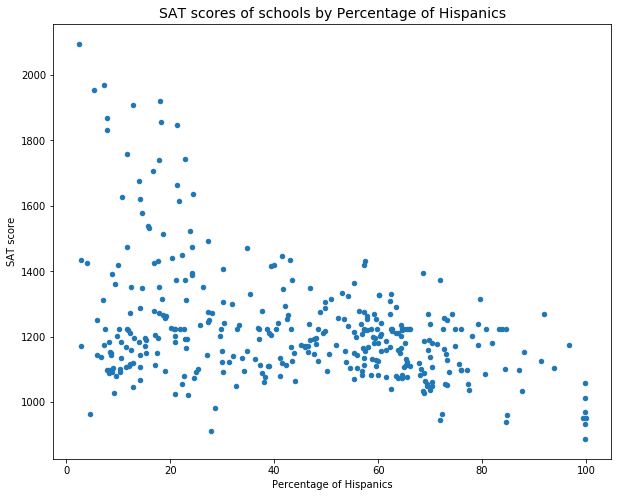

In [58]:
## Explore schools with low SAT scores and high values for hispanic_per.
ax = combined.plot.scatter('hispanic_per', 'sat_score', figsize=(10,8))
ax.set_xlabel('Percentage of Hispanics')
ax.set_ylabel('SAT score')
ax.set_title('SAT scores of schools by Percentage of Hispanics',fontdict={'fontsize':14} )
plt.show()

There is negative correlation between percentage of hispanics and SAT score.

In [59]:
## Research any schools with a hispanic_per greater than 95%
hispanics_over_95=combined[combined['hispanic_per'] > 95][['SCHOOL NAME','hispanic_per']]
hispanics_over_95

,SCHOOL NAME,hispanic_per
44,MANHATTAN BRIDGES HIGH SCHOOL,99.8
82,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,96.7
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND MATHEMATICS,99.8
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,99.4
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,99.8
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,99.8
253,MULTICULTURAL HIGH SCHOOL,99.8
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,100.0


The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

In [60]:
## Research any schools with a hispanic_per less than 10% and an average SAT score greater than 1800
his_schools=combined[(combined['hispanic_per']<10) & (combined['sat_score']>1800)]
his_schools=his_schools[['SCHOOL NAME','hispanic_per','sat_score']]
his_schools

,SCHOOL NAME,hispanic_per,sat_score
37,STUYVESANT HIGH SCHOOL,2.4,2096.0
151,BRONX HIGH SCHOOL OF SCIENCE,7.2,1969.0
187,BROOKLYN TECHNICAL HIGH SCHOOL,7.9,1833.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE,7.9,1868.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,5.3,1953.0


From our research, many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low `hispanic_per`, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

#### 5.3 Exploring Gender and SAT scores


Text(0.5, 1.0, 'Correlation of Races with SAT scores')

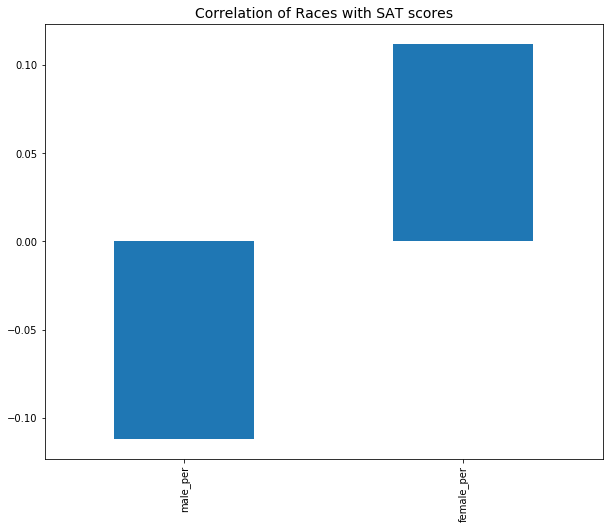

In [61]:
ax = combined.corr()['sat_score'][['male_per','female_per']].plot.bar(figsize=(10,8)) 
ax.set_title('Correlation of Races with SAT scores', fontdict={'fontsize':14})


In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. However neither correlation is extremely strong.

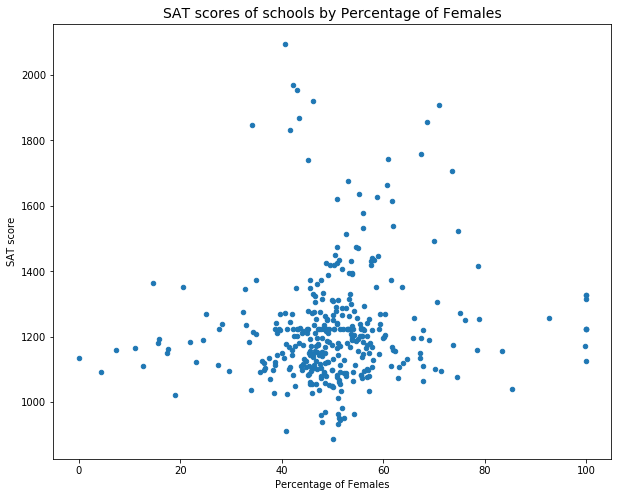

In [62]:
ax = combined.plot.scatter('female_per', 'sat_score', figsize=(10,8))
ax.set_xlabel('Percentage of Females')
ax.set_ylabel('SAT score')
ax.set_title('SAT scores of schools by Percentage of Females',fontdict={'fontsize':14} )
plt.show()

Based on the scatterplot, there doesn't seem to be any real correlation between `sat_score` and `female_per`. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

In [63]:
## Research any schools with a female_per greater than 60% and an average SAT score greater than 1700
fe_schools=combined[(combined['female_per']>60) & (combined['sat_score']>1700)]
fe_schools=fe_schools[['SCHOOL NAME','female_per']]
fe_schools

,SCHOOL NAME,female_per
5,BARD HIGH SCHOOL EARLY COLLEGE,68.7
26,ELEANOR ROOSEVELT HIGH SCHOOL,67.5
60,BEACON HIGH SCHOOL,61.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS,73.6
302,TOWNSEND HARRIS HIGH SCHOOL,71.1


Based on out research, these schools appears to be very selective liberal arts schools that have high academic standards.

#### 5.4 Exploring AP scores vs SAT scores
It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this relationship. Because `total_enrollment` is highly correlated with sat_score, we don't want to bias our results. Instead, we'll look at the percentage of students in each school who took at least one AP exam.

In [64]:
## calculate the percentage of students in each school that took an AP exam
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment']
combined['ap_per']

0      0.305756
1      0.098985
2      0.031773
3      0.351577
4      0.158091
5      0.209123
6      0.741545
7      0.297988
8      0.376177
9      0.307945
10     0.050725
11     0.229698
12     0.093126
13     0.080128
14     0.384014
15     0.341346
16     0.260664
17     0.297988
18     0.388641
19     0.424437
20     0.528807
21     0.152798
22     0.039841
23     0.180556
24     0.196891
25     0.295938
26     0.305720
27     0.137380
28     0.306482
29     0.115385
30     0.115321
31     0.737308
32     0.570924
33     0.733118
34     0.097902
35     0.290606
36     0.036923
37     0.457992
38     0.124845
39     0.544426
40     0.061100
41     0.056922
42     0.110497
43     0.594603
44     0.123845
45     0.305033
46     0.172805
47     0.016279
48     0.109836
49     0.043777
50     0.672025
51     0.111588
52     0.062500
53     0.069735
54     0.308681
55     0.352538
56     0.455932
57     0.360416
58     0.125969
59     0.589173
60     0.142857
61     0.265259
62     0

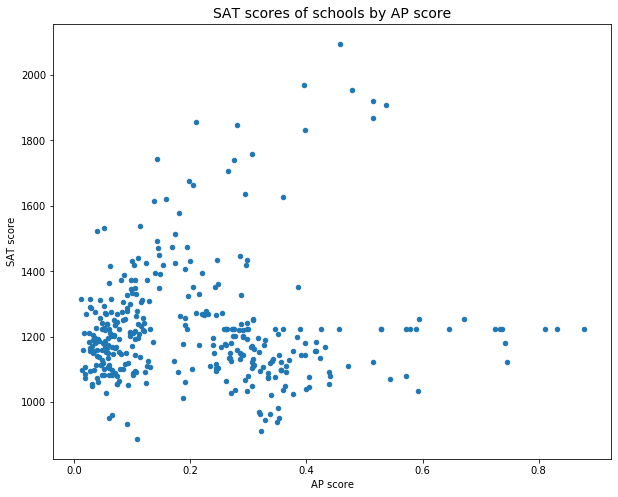

In [65]:
## plot scatter plot
ax = combined.plot.scatter('ap_per', 'sat_score', figsize=(10,8))
ax.set_xlabel('AP score')
ax.set_ylabel('SAT score')
ax.set_title('SAT scores of schools by AP score',fontdict={'fontsize':14} )
plt.show()

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.

## Conclusion

In conclusion, we can find that the SAT performace has strong correlations on safety scores and the percentage of English language learners. The schools that are selective in their admission process (entrance tests) tend to have a better performance.

Based on these, the preferred localities would be Manhattan, Queens and Bronx, where as Brooklyn would not be preferred.